# Mandelbrot Set Visualization (NumPy)
This notebook computes and visualizes the Mandelbrot set using NumPy, with interactive zoom and reset functionality.

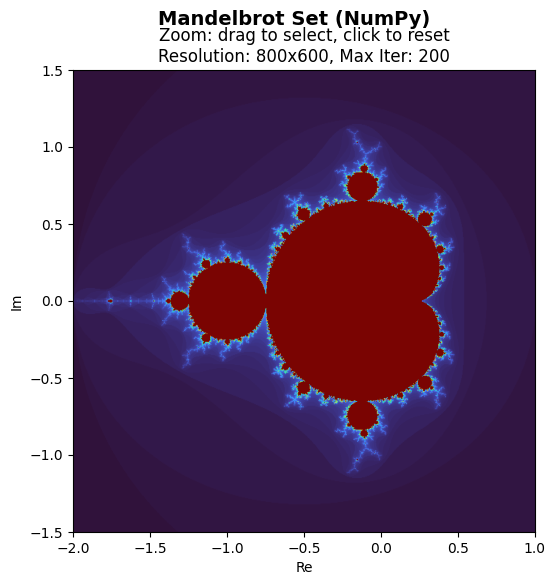

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from matplotlib.backend_bases import MouseButton

# Parameters
WIDTH, HEIGHT = 800, 600
MAX_ITER = 200
DEFAULT_VIEW = [-2.0, 1.0, -1.5, 1.5]
FIGURE_SIZE = (8, 6)
COLORMAP = 'turbo'

view = list(DEFAULT_VIEW)
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

def compute_mandelbrot(width, height, max_iter, re_min, re_max, im_min, im_max):
    re = np.linspace(re_min, re_max, width)
    im = np.linspace(im_min, im_max, height)
    c = re[np.newaxis, :] + 1j * im[:, np.newaxis]
    z = np.zeros_like(c)
    div_time = np.zeros(c.shape, dtype=int)
    mask = np.ones(c.shape, dtype=bool)
    for i in range(max_iter):
        z[mask] = z[mask] * z[mask] + c[mask]
        mask_new = np.abs(z) <= 2
        div_time[mask & ~mask_new] = i
        mask = mask & mask_new
    div_time[mask] = max_iter
    return div_time

def draw():
    ax.clear()
    fig.suptitle('Mandelbrot Set (NumPy)', fontsize=14, fontweight="bold")
    result = compute_mandelbrot(WIDTH, HEIGHT, MAX_ITER, *view)
    ax.imshow(result, extent=(view[0], view[1], view[2], view[3]), cmap=COLORMAP, origin='lower')
    ax.set_title(f'Zoom: drag to select, click to reset\nResolution: {WIDTH}x{HEIGHT}, Max Iter: {MAX_ITER}')
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    plt.draw()

def on_select(eclick, erelease):
    x0, y0 = eclick.xdata, eclick.ydata
    x1, y1 = erelease.xdata, erelease.ydata
    if abs(x1 - x0) < 1e-6 and abs(y1 - y0) < 1e-6:
        view[:] = DEFAULT_VIEW
    else:
        view[:] = min(x0, x1), max(x0, x1), min(y0, y1), max(y0, y1)
    draw()

draw()
selector = RectangleSelector(ax, on_select, useblit=True, button=[MouseButton.LEFT], spancoords='data', interactive=False, minspanx=0, minspany=0)
plt.show()
